In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score, precision_score, fbeta_score, accuracy_score, log_loss

In [4]:
#churn_df=pd.read_excel('C:/Users/user/Downloads/Jypiter/Logistička regresija SAMO BGW.xlsx')


In [5]:
churn_df=churn_df[['SEKTOR','godine', 'staž','zarada','churn']]

In [6]:
X=churn_df[['SEKTOR','godine','staž','zarada']]
y=churn_df['churn']

In [7]:
num_cols = ['godine', 'staž', 'zarada']  
cat_cols = ['SEKTOR'] 

In [8]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop=None), cat_cols)
])

X_transformed = preprocessor.fit_transform(X)

In [9]:
model = LogisticRegression(class_weight='balanced', max_iter=100)
model.fit(X_transformed, y)

LogisticRegression(class_weight='balanced')

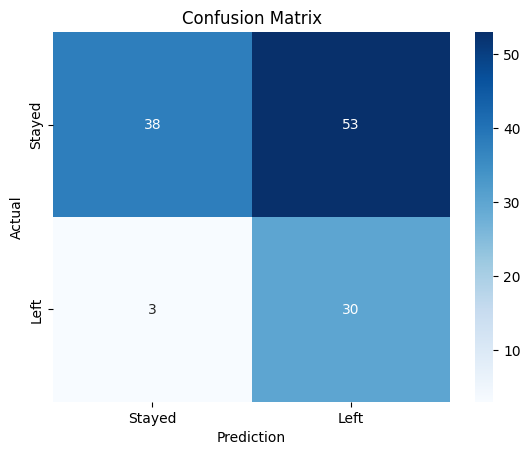

In [18]:

X_all_transformed = preprocessor.transform(X)
y_probs_all = model.predict_proba(X_all_transformed)[:, 1]  
y_pred_all = (y_probs_all >= 0.40).astype(int)  
cm_all = confusion_matrix(y, y_pred_all)
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:

recall = recall_score(y, y_pred_all)
precision = precision_score(y, y_pred_all)
f2_score = fbeta_score(y, y_pred_all, beta=2)
accuracy = accuracy_score(y, y_pred_all)
logloss = log_loss(y, y_probs_all)
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F2-score: {f2_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Log Loss: {logloss:.2f}")

Recall: 0.91
Precision: 0.36
F2-score: 0.70
Accuracy: 0.55
Log Loss: 0.61


In [20]:

thresholds = [0.4, 0.45, 0.48, 0.5, 0.55, 0.6, 0.65]

print("Threshold | Recall | False Positives (flagged as at risk but did not leave)")

print("--------------------------------------------------------------")

for t in thresholds:
    y_pred_temp = (y_probs_all >= t).astype(int)
    
    
    false_positive = ((y == 0) & (y_pred_temp == 1)).sum()
    
   
    recall = recall_score(y, y_pred_temp)
    
    print(f"   {t:.2f}    |  {recall:.2f}  |            {false_positive}")

Threshold | Recall | False Positives (flagged as at risk but did not leave)
--------------------------------------------------------------
   0.40    |  0.91  |            53
   0.45    |  0.85  |            51
   0.48    |  0.76  |            49
   0.50    |  0.76  |            47
   0.55    |  0.67  |            35
   0.60    |  0.39  |            22
   0.65    |  0.18  |            4


In [15]:

churn_export = churn_df.copy()
y_probs_both = model.predict_proba(X_all_transformed)
churn_export['procenat_ostanka'] = y_probs_both[:, 0]
churn_export['procenat_odlaska'] = y_probs_both[:, 1]
churn_export['predikcija'] = y_pred_all
#churn_export.to_excel("C:/Users/jelena.pantic/Downloads/Jypiter/predikcija_odlaska_detaljnosamow.xlsx", index=False)
#print("Fajl uspešno sačuvan kao 'predikcija_odlaska_detaljnosamobgsamow.xlsx'")

Fajl uspešno sačuvan kao 'predikcija_odlaska_detaljnosamobgsamow.xlsx'


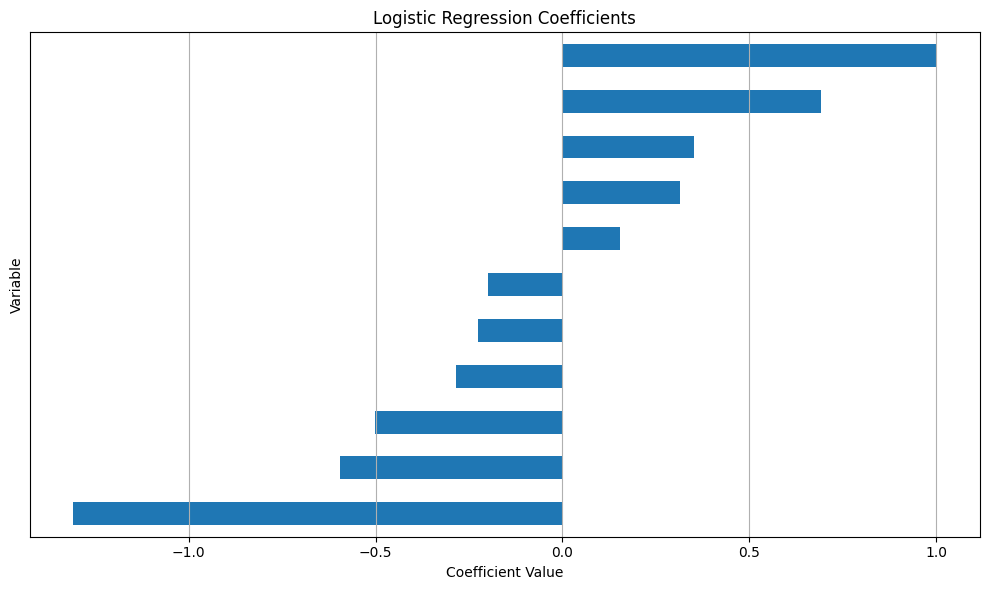

In [21]:

num_features = num_cols
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_features, cat_feature_names])
coefficients = pd.Series(model.coef_[0], index=all_feature_names)
coefficients.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Variable")
plt.yticks([])
plt.grid(True)
plt.tight_layout()
plt.show()